In [1]:
import pandas as pd
import numpy as np
import os

datasets = ['processed_categorical_dataset_basen.csv', 'processed_categorical_dataset_label.csv', 'processed_categorical_dataset_target.csv']
setnames = ['Base-N encoding', 'Label encoding', 'Target encoding']

# 'select' is set to 0, which represents the index of the setnames list to select a specific dataset name.
select = 1

path_original_data = r"C:\Users\Usuario\Documents\FOLDER_JupyterNotebook\unimi_files\SMML"
df = pd.read_csv(os.path.join(path_original_data, datasets[select]), low_memory=False)

In [2]:
# 'name_of_set' is assigned the value at index 'select' in the list 'setnames'.
name_of_set = setnames[select]

# Set the random state for data splitting to a specific value, most of the data saved was computed using the state 1.
set_number = 1

# Print the shape of the DataFrame 'df'
print(df.shape)

# Display the first few rows of the DataFrame 'df'
df.head()

(113549, 19)


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.329463,0.173865,0.159509,0.73,0.798169,0.0,0.686294,0.4610,-0.75730,-0.136198,0.0,0.682593,0.179804,0.063221,0.814285,0.718593,0.361245,0.024533,0.0
1,0.104562,0.317593,0.306058,0.55,0.770186,0.0,0.426396,0.1660,-0.75730,-0.347964,1.0,0.602004,0.963177,0.088923,0.632214,0.268342,0.318397,0.024533,0.0
2,0.394357,0.840603,0.825655,0.57,0.792356,0.0,0.444670,0.3590,-0.93303,-0.196523,1.0,0.565283,0.459177,0.000000,0.651084,0.120603,0.313643,0.024533,0.0
3,0.472038,0.184168,0.130151,0.71,0.789571,0.0,0.270051,0.0596,-0.93303,-0.373806,1.0,0.518891,0.953223,0.147871,0.666983,0.143719,0.746758,-0.231600,0.0
4,0.167165,0.362733,0.349002,0.82,0.788577,0.0,0.627411,0.4430,-0.58157,-0.195453,1.0,0.558845,0.686210,0.000000,0.607730,0.167839,0.492863,0.024533,0.0


In [3]:
def ridge_fit(x, y, alpha, predictors, manual_scaling):
    # Check if 'predictors' is empty, and if so, use all columns from 'x'
    if len(predictors) == 0:
        X = x.copy()
    else:
        X = x[predictors].copy()

    y = y.copy()

    # Compute the mean and standard deviation of 'X' for manual scaling
    x_mean = X.mean()
    x_std = X.std()

    # Apply manual scaling to 'X' if required
    if manual_scaling:
        X = (X - x_mean) / x_std

    # Add an intercept column to 'X' for Ridge Regression
    X["intercept"] = 1
    X = X[["intercept"] + predictors]

    # Create the Ridge penalty matrix with alpha and update the first element to 0
    penalty = alpha * np.identity(X.shape[1])
    penalty[0][0] = 0

    # Calculate the coefficients 'B' using Ridge Regression formula
    B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
    B.index = ["intercept"] + predictors

    return B, x_mean, x_std


def ridge_predict(x, B, predictors, manual_scaling, x_mean, x_std):
    # Check if 'predictors' is empty, and if so, use all columns from 'x'
    if len(predictors) == 0:
        test_x = x.copy()
    else:
        test_x = x[predictors].copy()

    # Apply manual scaling to 'X' if required
    if manual_scaling:
        test_x = (test_x - x_mean) / x_std

    # Add an intercept column to 'test_x' for Ridge Regression
    test_x["intercept"] = 1
    test_x = test_x[["intercept"] + predictors]

    # Make predictions using the Ridge Regression coefficients 'B'
    predictions = test_x @ B

    return predictions


def correlation(dataset, threshold):
    correlated_columns = set()
    correlation_matrix = dataset.corr()

    # Find pairs of highly correlated columns based on the threshold
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                print(f'- Column 1: {correlation_matrix.columns[i]}, Column 2: {correlation_matrix.columns[j]}')
                colname = correlation_matrix.columns[i]
                correlated_columns.add(colname)
    print()

    return correlated_columns


def model(name):
    # Fit the specified model ('name') to the training data
    name.fit(dx_train, dy_trainL)
    # Make predictions on the test data
    prediction = name.predict(dx_test)
    # Calculate residuals
    residual = dy_testL - prediction

    # Plot the actual vs. predicted values and residual distribution
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(dy_testL, prediction)

    plt.subplot(1, 2, 2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()

## Select features for the analysis

In [4]:
# Set the target variable (output) to 'popularity'
output = "popularity"

# Create the input DataFrame (dx) by dropping the 'popularity' column from the original DataFrame (df)
dx = df.drop([output], axis=1)

# Create the target Series (dy) containing the 'popularity' values from the original DataFrame (df)
dy = df[output]

# Create a list of input features (columns) in the DataFrame dx
inputs = list(dx.columns)
print(f'Original features: {inputs}\n')

# Set the regularization parameter (lamba_var) to 2
lamba_var = 2

# Import the train_test_split function from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the input DataFrame (dx) and target Series (dy) into training and testing sets
# The training set will contain 80% of the data, and the random state is set to 'set_number' for reproducibility
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=set_number)

Original features: ['artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']



### Remove the input predictors correlated with each other.

### Train a model using libraries for comparisionn

In [5]:
# Create the DataFrame 'dxL' by dropping the 'popularity' column from the original DataFrame 'df'
dxL = df.drop(['popularity'], axis=1)

# Create the Series 'dyL' containing only the 'popularity' values from the original DataFrame 'df'
dyL = df['popularity']

# Import the train_test_split function from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the input DataFrame 'dxL' and target Series 'dyL' into training and testing sets
# The training set will contain 80% of the data, and the random state is set to 'set_number' for reproducibility
dx_trainL, dx_testL, dy_trainL, dy_testL = train_test_split(dxL, dyL, test_size=0.2, random_state=set_number)

# Print the shapes of the training and testing sets for input features and output/target variable
print(f'Training set: {dx_trainL.shape}, Test set: {dx_testL.shape}')
print(f'Training output: {dy_trainL.shape}, Test output: {dy_testL.shape}\n')

# Use only the input predictor features identified as non-correlated
# Update the training and testing sets with the selected input features
dx_trainL = dx_trainL[inputs]
dx_testL = dx_testL[inputs]

# Check for missing values (NaN) in the training set after selecting the input features
missing_values_count = dx_trainL.isna().sum()
print(missing_values_count)

Training set: (90839, 18), Test set: (22710, 18)
Training output: (90839,), Test output: (22710,)

artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


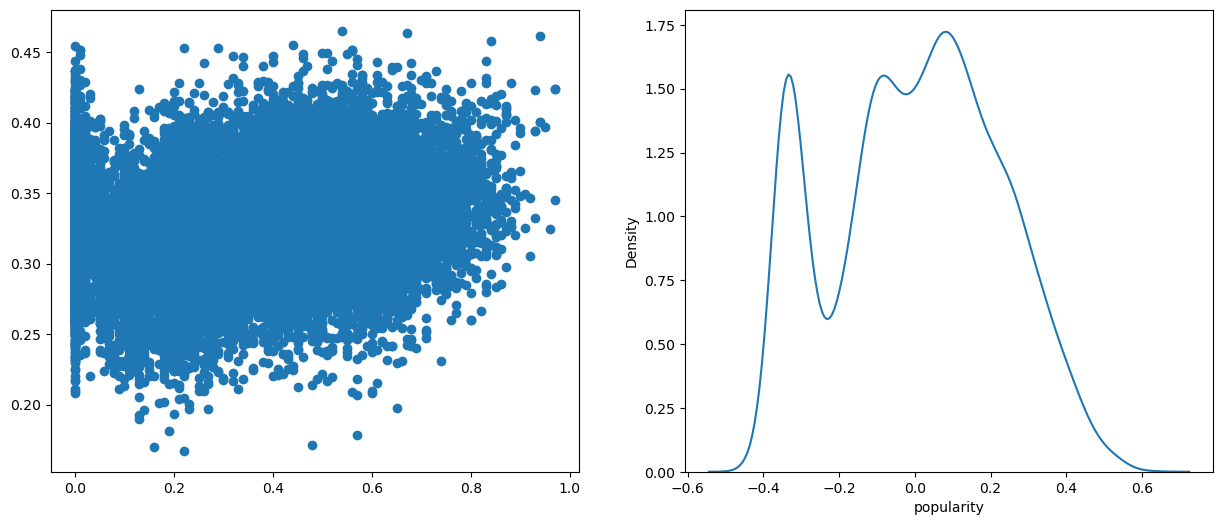

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

ridge = Ridge()

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

model(ridge)

## Run both models side by side

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Lists to store the MSE, ABMSE, and R2 score for the library model and custom models
MSE = []
ABMSE = []
R2_score = []

# Run the library model (using the predefined 'ridge' model)
prediction = ridge.predict(dx_test)
mse = mean_squared_error(dy_testL, prediction)
abmse = mean_absolute_error(dy_testL, prediction)
score = r2_score(dy_testL, prediction)
MSE.append(mse)
ABMSE.append(abmse)
R2_score.append(score)

# Run the custom Ridge Regression models for different alpha values

# Generate two sequences of alpha values: 10**i and each element of (10**i * 5) for i in range(-2, 4)
alphas_1 = [10**i for i in range(-2, 4)]
alphas_2 = [alpha * 5 for alpha in alphas_1]

# Combine the two sequences and order them in ascending order to get a final list of alpha values
combined_alphas = sorted(alphas_1 + alphas_2)

# Set the variable 'alphas' to the list of combined alpha values
alphas = combined_alphas

# Print the combined alpha values
print(combined_alphas)

# Iterate over the alpha values to run the custom Ridge Regression models
for alpha in alphas:
    # Fit the custom Ridge Regression model and get the coefficients, mean, and standard deviation
    B, x_mean, x_std = ridge_fit(dx_train, dy_train, alpha, inputs, False)  # Without 'inputs' will use all columns
    
    # Make predictions using the custom Ridge Regression model
    predictions = ridge_predict(dx_test, B, inputs, False, x_mean, x_std)  # Without 'inputs' will use all columns
    
    # Calculate the MSE, ABMSE, and R2 score for the predictions and store them in the corresponding lists
    mse = mean_squared_error(dy_test, predictions)
    abmse = mean_absolute_error(dy_test, predictions)
    score = r2_score(dy_test, predictions)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)


[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000]


In [8]:
# Initialize lists to store model names and evaluation metrics
algosname = [name_of_set + ' reference']  # Model names (start with the reference model)

# Append the model names for each alpha value in the 'alphas' list
for alpha in alphas:
    algosname.append(f"{name_of_set}")  # Model names for custom models

# If the number of alphas is less than the number of model names, add a reference lambda column with a default value of 1
if len(alphas) < len(algosname):
    print('Filling lambda column...')
    alphas = [1] + alphas

# Read the existing metrics DataFrame from the file 'numerical_metrics_alternative.csv'
df_metrics = pd.read_csv(os.path.join(path_original_data, 'categorical_metrics.csv'), low_memory=False)

# Create a new DataFrame 'metrics' with the evaluation metrics for the custom models
metrics = pd.DataFrame(
    list(zip(algosname, alphas, MSE, ABMSE, R2_score)),
    columns=['Model', 'Lambda', 'MSE', 'ABMSE', 'R2_score']
)

# Append the 'metrics' DataFrame to the existing 'df_metrics' DataFrame
combined_df = df_metrics.append(metrics, ignore_index=True)
# ...uncomment this to store the results on the dataset
# combined_df.to_csv(os.path.join(path_original_data, 'categorical_metrics.csv'), index=False)

# Display the final combined DataFrame
# ...use this to see the full set of metrics
# combined_df
# ...use this to avoid printing the full list
metrics 

Filling lambda column...


,Model,Lambda,MSE,ABMSE,R2_score
0,Label encoding reference,1.00,0.048859,0.184202,0.029153
1,Label encoding,0.01,0.048859,0.184199,0.029150
2,Label encoding,0.05,0.048859,0.184199,0.029150
3,Label encoding,0.10,0.048859,0.184199,0.029150
4,Label encoding,0.50,0.048859,0.184200,0.029151
5,Label encoding,1.00,0.048859,0.184202,0.029153
6,Label encoding,5.00,0.048858,0.184213,0.029166
7,Label encoding,10.00,0.048857,0.184228,0.029180
8,Label encoding,50.00,0.048854,0.184338,0.029239
9,Label encoding,100.00,0.048855,0.184466,0.029226


# PREDICTION SHOWCASE

In [9]:
# Create a new DataFrame 'combined_df' by concatenating 'predictions' and 'dy_test' along the columns (axis=1)
combined_df = pd.concat([predictions, dy_test], axis=1)

# Rename the columns in 'combined_df' as 'Prediction' and 'Popularity' respectively
combined_df.columns = ['Prediction', 'Popularity']

# This column calculates the difference between the 'Prediction' and 'Popularity' columns
combined_df['Difference'] = combined_df['Prediction'] - combined_df['Popularity']

# Display a random sample of 10 rows from the DataFrame 'combined_df'
combined_df.head(10)

,Prediction,Popularity,Difference
19719,0.324867,0.67,-0.345133
91667,0.327967,0.00,0.327967
86029,0.303579,0.44,-0.136421
59413,0.315904,0.00,0.315904
108480,0.328748,0.16,0.168748
85189,0.352983,0.38,-0.027017
76094,0.318350,0.22,0.098350
10454,0.314936,0.15,0.164936
31416,0.312985,0.50,-0.187015
27061,0.329303,0.58,-0.250697


# RESULT VERIFICATION

In [10]:
# Import the 'train_test_split' function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the input features 'dx' and the target variable 'dy' into training and testing sets
# The testing set size is set to 20% of the entire dataset
# The random_state is set to 1 to ensure reproducibility of the split
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=1)

# Fit a ridge regression model using the custom function 'ridge_fit'
# The regularization parameter (alpha) is set to 1
# The input predictors used for the model are 'inputs'
# The manual_scaling parameter is set to False, indicating that no manual scaling is applied
# The resulting model coefficients (Betas) are stored in the variable 'B'
B, x_mean, x_std = ridge_fit(dx_train, dy_train, 1, inputs, False)

# Display the model coefficients (Betas)
# The variable 'B' contains the coefficients of the ridge regression model
B


intercept           0.339392
artists             0.004028
album_name          0.031520
track_name         -0.004687
duration_ms         0.103233
explicit            0.040782
danceability        0.085327
energy              0.006588
key                -0.002959
loudness            0.040183
mode               -0.009581
speechiness        -0.226833
acousticness        0.010716
instrumentalness   -0.065585
liveness            0.010588
valence            -0.093831
tempo               0.051796
time_signature      0.050546
track_genre         0.020222
dtype: float64